# Intro to NumPy

We're going to build on the work you did in [`Ex_Functions`](Ex_Functions.ipynb).

Recall our functions from that notebook:

In [1]:
from utils import vp_from_dt, impedance, rc_series

Let's load a bit of data:

In [2]:
from welly import Well

w = Well.from_las('../data/R-39.las')

In [3]:
import numpy as np

dt = np.array(w.data['DT4P'])
rhob = np.array(w.data['RHOB'])

In [4]:
dt[1000:1020]

array([ 302.5828,  301.2728,  298.5636,  288.194 ,  281.4649,  279.1137,
        269.2634,  276.066 ,  279.5238,  284.2258,  286.6032,  287.4814,
        275.9168,  272.7144,  267.2059,  263.389 ,  263.9553,  266.1015,
        273.3557,  270.7604])

These are NumPy arrays, which we'll meet properly in a minute. For now, just notice that they look a lot like lists... which should mean that our functions work on them.

In [6]:
vp_from_dt(dt)

[3215.1404823482358,
 3215.1404823482358,
 3215.1404823482358,
 3215.1404823482358,
 3215.1404823482358,
 3215.1404823482358,
 3215.1404823482358,
 3215.1404823482358,
 3215.1404823482358,
 3215.1404823482358,
 3215.1404823482358,
 3215.1404823482358,
 3215.1404823482358,
 3215.1404823482358,
 3214.1887146620038,
 3229.356660483525,
 3183.4298655382895,
 3127.4951547281312,
 3104.913152474212,
 3087.2401585730036,
 3033.1670753353774,
 3172.141995226561,
 3138.399002240189,
 3120.5201033266617,
 3123.6656090976135,
 3073.3249226674616,
 3040.619021382849,
 2993.0020618791204,
 2938.7269552378989,
 2954.3162264637012,
 2965.5075881408166,
 2950.6593690959148,
 2907.3435427609184,
 2922.7374358824477,
 2963.3817875889422,
 2984.1891689450949,
 3010.7006321869189,
 3023.7405969226784,
 3010.4051644102678,
 3025.3460466441802,
 3046.8622650678763,
 3050.0339773785076,
 3051.0157289013873,
 3080.9937807059541,
 3090.3122111523803,
 3156.8077980728954,
 3098.960980362504,
 3122.9768965292174

Our functions do work on them!

In [6]:
z = impedance(vp_from_dt(dt), rhob)
rc = rc_series(z)

In [7]:
rc

[0.00088800429199709151,
 0.00042668570200545187,
 0.00086730096657770697,
 -0.0010406009309613957,
 -0.00083023113831957396,
 0.00084322362252095605,
 0.00090627409322461628,
 3.2456371927591016e-05,
 -0.0017628465379843968,
 -0.0014637098104735337,
 -0.0030015545246319963,
 0.0012067152275087101,
 0.0092963130405134906,
 0.020557263196784741,
 0.015259114371602382,
 -0.013315442208808934,
 -0.028666692255938542,
 -0.017235100461977109,
 -0.0023107170605410937,
 0.0047897931683409112,
 0.046722372643360245,
 0.022676302492769331,
 0.012453424179670901,
 0.010030173193281405,
 -0.0078192995324795917,
 -0.018023761977692877,
 -0.014006712162492363,
 -0.011300531988809294,
 -0.0012770218252823057,
 0.0079763572659230075,
 0.0053157451552994124,
 -0.0037864008557441497,
 -0.0041429979046772227,
 0.0042983731400209248,
 0.0022199654077678442,
 0.0013687560664557238,
 0.0027422229774676432,
 -0.0019886270492582825,
 0.0066030609853400691,
 0.0028679573735021979,
 0.005260685984992468,
 0.00

## What is NumPy?

As you can see, NumPy's `ndarray` data structures are a lot like lists. We can even throw them into the functions we wrote for lists.

As we'll see, however, they have a big advantage over lists. The punchline is, we're going to want to re-write our functions.

We instantiate an `ndarray` with a list, or any sequence:

In [8]:
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

In [9]:
a[0], a[-1]

(1, 5)

In [11]:
a.append(6)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

OK, so they're not exactly like lists. Indeed, there's one very big difference. 

Recall that trying to multiply a list doesn't do what you want it to do:

In [12]:
print(10 * [1, 2, 3, 4, 5])

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


Instead, to multiply the numbers in a list by 10, we have to do something like this:

In [13]:
[10 * n for n in a]

[10, 20, 30, 40, 50]

But NumPy has a superpower: ufunc. What the heck is ufunc? It doesn't really matter, the point is what it enables: elementwise arithmetic. 

In [14]:
10 * a

array([10, 20, 30, 40, 50])

This proves to be A Very Powerful Thing.

NumPy contains lots of other tools, including convolution, interpolation, and linear algebra operators, but most of what we do with it every day revolves around the `ndarray`, so we're going to spend a bit of time getting to know them.

## The `ndarray`

First, let's look at some ways to generate arrays:

In [15]:
np.ones(10), np.zeros(10), np.ones_like([2, 4, 6, 8])

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([1, 1, 1, 1]))

In [16]:
np.ones(10) * np.pi

array([ 3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265])

In [6]:
np.arange(0, 10, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.linspace(0, 9, 10)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [18]:
np.arange(10) + np.arange(0, 100, 10)

array([ 0, 11, 22, 33, 44, 55, 66, 77, 88, 99])

In [19]:
np.arange(10) + np.arange(0, 110, 10)

ValueError: operands could not be broadcast together with shapes (10,) (11,) 

In [20]:
# What's broadcasting?
np.arange(10) + 100

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])

In [21]:
# Scalar plus 1D array
np.arange(10) + np.arange(0, 20, 2)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [10]:
# 2D array
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [22]:
# 2D array multiplied by 1D array
np.ones((3,3)) * np.array([1, 10, 100])

array([[   1.,   10.,  100.],
       [   1.,   10.,  100.],
       [   1.,   10.,  100.]])

In [11]:
# Dot product
np.ones((3,3)) @ np.array([1, 10, 100])

array([ 111.,  111.,  111.])

In [12]:
# Dot product
np.dot(np.ones((3,3)), np.array([1, 10, 100]))

array([ 111.,  111.,  111.])

In [23]:
theta = np.arange(0, np.pi, 0.1)
y = np.sin(theta)**2
y

array([ 0.        ,  0.00996671,  0.0394695 ,  0.08733219,  0.15164665,
        0.22984885,  0.31882112,  0.41501643,  0.51459976,  0.61360105,
        0.70807342,  0.79425056,  0.86869686,  0.92844438,  0.97111117,
        0.99499625,  0.99914739,  0.9833991 ,  0.94837921,  0.89548386,
        0.82682181,  0.74513041,  0.65366643,  0.55607626,  0.45625051,
        0.35816891,  0.26574166,  0.18265356,  0.11221706,  0.05724024,
        0.01991486,  0.00172895])

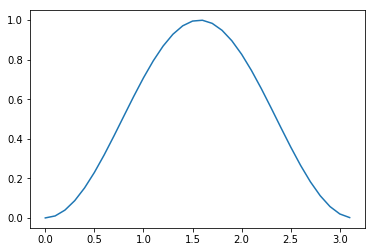

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(theta, y)

In [25]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [26]:
a = np.ones((5, 3))
a[:, 0] = 100
a

array([[ 100.,    1.,    1.],
       [ 100.,    1.,    1.],
       [ 100.,    1.,    1.],
       [ 100.,    1.,    1.],
       [ 100.,    1.,    1.]])

In [27]:
a.T

array([[ 100.,  100.,  100.,  100.,  100.],
       [   1.,    1.,    1.,    1.,    1.],
       [   1.,    1.,    1.,    1.,    1.]])

In [28]:
a.shape

(5, 3)

In [87]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [88]:
a[2]

array([10, 11, 12, 13, 14])

In [89]:
a[:, 2]

array([ 2,  7, 12, 17, 22])

In [90]:
np.random.random(10)

array([ 0.4748917 ,  0.02570995,  0.201887  ,  0.76536836,  0.14163781,
        0.17578195,  0.41912566,  0.0105405 ,  0.30945759,  0.85704861])

Draw porosities from a normal distribution.

In [91]:
np.random.normal(loc=20, scale=3, size=10)

array([ 16.25933611,  23.1138545 ,  21.90330466,  17.797392  ,
        20.5170207 ,  23.21066115,  22.53262729,  18.54169116,
        16.54594371,  22.80875401])

In [92]:
np.nan

nan

In [93]:
np.isnan(np.nan), np.isnan(0)

(True, False)

In [94]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [95]:
a = a.astype(float)

In [96]:
# Boolean arrays
a > 12

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [97]:
a[a > 12] = np.nan
a

array([[  0.,   1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan]])

In [105]:
# Indexing with arrays
a = np.arange(10)
b = np.array([3, 4, 5])
a[b]

array([3, 4, 5])

In [104]:
c = np.random.randint(3, size=(5,5))
c

array([[0, 2, 0, 0, 0],
       [1, 0, 1, 1, 0],
       [0, 2, 1, 1, 2],
       [2, 0, 1, 0, 2],
       [0, 1, 2, 0, 2]])

In [106]:
d = np.array([111,222,333])
d

array([111, 222, 333])

In [107]:
# Fancy indexing
d[c]

array([[111, 333, 111, 111, 111],
       [222, 111, 222, 222, 111],
       [111, 333, 222, 222, 333],
       [333, 111, 222, 111, 333],
       [111, 222, 333, 111, 333]])

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>